
# Entrega 4

***Laboratorio de Bioseñales***

Orman Jesús Contreras Mulford

Maria camila Melan Guerra


In [14]:
#librerias convencionales
import numpy as np;
#libreria para graficar
import matplotlib.pyplot as plt
from csv import reader as reader_csv;
import scipy.signal as signal;



In [15]:
import scipy.io as sio;
import numpy as np;
import matplotlib.pyplot as plt
import glob
import pandas as pd
import math
import os
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro , levene, mannwhitneyu
from google.colab import drive
drive.mount('/content/drive')   #permiso para trabajar con el drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!unzip /content/drive/MyDrive/Practica_4/datos_senales_datos_parkinson_cursos.zip #descomprimiendo carpeta

Archive:  /content/drive/MyDrive/Practica_4/datos_senales_datos_parkinson_cursos.zip
   creating: control/
  inflating: control/C001R_EP_reposo.mat  
  inflating: control/C002_EP_reposo.mat  
  inflating: control/C004_EP_reposo.mat  
  inflating: control/C005_EP_reposo_Repetido.mat  
  inflating: control/C006_EP_reposo.mat  
  inflating: control/C007_EP_reposo.mat  
  inflating: control/C010_EP_reposo.mat  
  inflating: control/C011_EP_reposo.mat  
  inflating: control/C012_EP_reposo.mat  
  inflating: control/C013_EP_reposo.mat  
  inflating: control/C015_EP_reposo.mat  
  inflating: control/C018_EP_reposo.mat  
  inflating: control/C019_EP_reposo.mat  
  inflating: control/C020_EP_reposo.mat  
  inflating: control/C021_EP_reposo.mat  
  inflating: control/C023_EP_reposo.mat  
  inflating: control/C024_EP_reposo.mat  
  inflating: control/C025_EP_reposo.mat  
  inflating: control/C026_EP_reposo.mat  
  inflating: control/C027_EP_reposo.mat  
  inflating: control/C028_EP_reposo.mat  
 

In [17]:
control = glob.glob('/content/control/*.mat')  # se buscan los archivos mat en la carpetas
parkinson = glob.glob('/content/parkinson/*.mat')


In [18]:
data = sio.loadmat(control[0]); #se extrae un archivo de la carpeta control
data = data['data']  #se guarda en la variable data

print(data.shape)

(8, 2000, 179)


In [19]:
import os
directorio_actual=os.getcwd()
print(directorio_actual)

/content


In [20]:
archivos_control=os.listdir(directorio_actual + "/control")
print(len(archivos_control))

36


In [21]:
archivos_control[7]

'C044_EP_reposo.mat'

In [22]:
#ruta de un archivo
path_subjecti=(directorio_actual + "/control" + "/" + archivos_control[7])
#1 CARGAR EL ARCHIVO
dato = sio.loadmat(path_subjecti)
dato=dato['data']

In [23]:
dato.shape

(8, 2000, 258)

In [24]:
archivos_parkinson=os.listdir(directorio_actual + "/parkinson")
print(len(archivos_parkinson))

23


In [25]:
#ruta de un archivo
path_subjec=(directorio_actual + "/parkinson" + "/" + archivos_parkinson[7])
#1 CARGAR EL ARCHIVO
datop = sio.loadmat(path_subjec)
datop=datop['data']

In [27]:
datop.shape

(8, 2000, 143)

# 1.


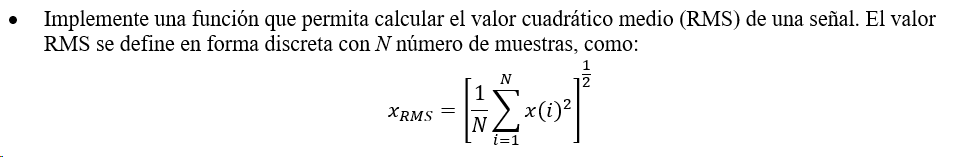

In [28]:
# Defino la función que Calcula el Valor Cuadrático Medio (RMS) de una señal discreta.
def RMS(signal):
    # Elevar al cuadrado cada elemento de la señal
    squared_values = np.square(signal)

    # Calcular el promedio de los valores al cuadrado
    mean_squared = np.mean(squared_values)

    # Calcular la raíz cuadrada del promedio de los valores al cuadrado
    rms = np.sqrt(mean_squared)

    return rms

#1. Implemente una función que reciba una señal de múltiples canales y épocas y calcule la Energía de promedio de cada canal.

- Organizo las señales tanto de control como de parkinson

In [29]:
directorio_actual=os.getcwd();
print(directorio_actual)

#listando los archivos en el directorio
archivos=os.listdir(directorio_actual + "/control")
print(len(archivos))

fs = 1000;
num_canales = 8;

/content
36


In [30]:
#CARGAMOS LOS CONTROLES
for i in range(0,len(archivos_control)):
    #ruta de un archivo
    sujetoi=(directorio_actual + "/control" + "/" + archivos_control[i]);
    #1 CARGAR EL ARCHIVO
    data = sio.loadmat(sujetoi);
    data = data["data"];

    #2 VOLVERLO CONTINUO
    sensores = data.shape[0];
    puntos = data.shape[1];
    epocas = data.shape[2];

    senal_continua = np.reshape(data,(sensores, puntos*epocas), order = 'F');


In [31]:
senal_continua.shape

(8, 308000)

In [32]:
#CARGAMOS LOS PARKINSON
for i in range(0,len(archivos_parkinson)):
    #ruta de un archivo
    sujeto_p=(directorio_actual + "/parkinson" + "/" + archivos_parkinson[i]);
    #1 CARGAR EL ARCHIVO
    dato_p = sio.loadmat(sujeto_p);
    dato_p = dato_p["data"];

    #2 VOLVERLO CONTINUO
    sensores_p = dato_p.shape[0];
    puntos_p = dato_p.shape[1];
    epocas_p = dato_p.shape[2];

    senal_continua_p = np.reshape(dato_p,(sensores_p, puntos_p*epocas_p), order = 'F');

In [33]:
senal_continua_p.shape

(8, 396000)

- Creo la función que me resiva la señal de multiples canales y epocas

In [34]:

def RMS_promedio(signal):
  rms_promedio = []
  num_canales, longitud_señal = signal.shape
  for canal in range(num_canales):
    s=signal[canal, :]
    rms_pro= RMS(s)
    rms_promedio.append(rms_pro)


  return rms_promedio

In [35]:
senal_continua.shape

(8, 308000)

In [36]:
 RMS_prom_canal = RMS_promedio(senal_continua)

Imprimo los resultados de la función, para la señal de control.

In [37]:
print(RMS_prom_canal)

[1.8779637071637487, 1.8004665439443197, 1.8348883606171802, 1.798144972969315, 1.8313057933078092, 2.939816798022907, 2.881406839008531, 3.029046251989119]


Imprimo los resultados para los pacientes con parkinso

In [38]:
senal_continua_p.shape

(8, 396000)

In [39]:
rms_par=RMS_promedio(senal_continua_p)
print(rms_par)

[4.9968906994042745, 4.797420934172712, 4.834589263017398, 4.642698694622628, 4.6326702790126, 14.574603247124587, 11.902637266682943, 14.29863675581725]


# 2. Calcule la energía de cada canal promediada por épocas para cada sujeto, esto para ambos grupos poblacionales. Guarde esta información en un DataFrame de columnas ‘canal’ y filas ‘#sujeto’ con los valores de energía calculados, un DataFrame para cada grupo poblacional.

- Creo el dataframe para el grupo control

In [40]:
#se crean las lista para llenar con la información.
c0,c1,c2,c3,c4,c5,c6,c7=[], [], [], [], [], [], [], []
Canales_sujeto_control= []
Canales=[]
sc= []
status=[]

for sujeto_c in range(len(control)): # se hace un for que me recorre los sujeros de control

  subj = control[sujeto_c].split('/')
  subj= subj[len(subj)-1].split('.')
  sc.append(subj[0])  # se extrae el ID del sujeto de la ruta del archivo y lo agrega a la lista sc
  status.append("CONTROL") #se agrega el estado del sujeto en la lista status
  Datos_sujeto_control = sio.loadmat(control[sujeto_c]) #se carga el archivo de datos para el sujeto utilizando la función loadmat
  senal_c = Datos_sujeto_control['data']
   #2 VOLVERLO CONTINUO
  se = senal_c.shape[0];
  pu = senal_c.shape[1];
  epo= senal_c.shape[2];

  senal_cont= np.reshape(senal_c,(se, pu*epo), order = 'F');
  Canales_sujeto_control.append(RMS_promedio(senal_cont)) #se saca el rms para cada uno de los archivos de control
  # y se guardan en la lista Canales_sujeto_control

  #Se preparan las listas para la crecaion del dataframe
Canales.extend(Canales_sujeto_control) #se concatenan las listas de los pacientes control

for c in Canales: #Se genera un for que me recorre la lisat canales y me lo guarda en una lista idependiente para la creación del Dataframe
  c0.append(c[0])
  c1.append(c[1])
  c2.append(c[2])
  c3.append(c[3])
  c4.append(c[4])
  c5.append(c[5])
  c6.append(c[6])
  c7.append(c[7])

In [41]:
#Se asignan las listas a cada una de las columnas del dataframe
Dframe_c= pd.DataFrame(list(zip(sc,status,c0,c1,c2,c3,c4,c5,c6,c7)), columns = ['SUJETO','ESTADO','CANAL_1','CANAL_2','CANAL_3','CANAL_4','CANAL_5','CANAL_6','CANAL_7','CANAL_8'])
Dframe_c

,SUJETO,ESTADO,CANAL_1,CANAL_2,CANAL_3,CANAL_4,CANAL_5,CANAL_6,CANAL_7,CANAL_8
0,C019_EP_reposo,CONTROL,4.125318,4.199776,4.343273,3.898911,4.015907,8.654621,9.854405,11.622417
1,C036_EP_reposo,CONTROL,2.314863,2.083070,1.191203,1.457257,1.992586,3.515789,3.245158,3.127411
2,C018_EP_reposo,CONTROL,3.952879,3.480142,3.761523,3.562217,4.066906,10.973493,8.832611,11.791848
3,C042_EP_reposo,CONTROL,4.715703,5.856181,6.224225,6.316118,5.932387,13.141030,10.384459,12.224536
4,C005_EP_reposo_Repetido,CONTROL,4.201863,4.178318,4.404567,4.208743,4.237067,7.300621,7.310457,7.500692
5,C028_EP_reposo,CONTROL,2.849372,2.539675,2.488602,2.466562,3.104830,5.374409,5.176020,5.867678
6,C001R_EP_reposo,CONTROL,3.276099,3.239283,3.373437,3.041845,3.855526,3.552757,3.375006,3.511310
7,C044_EP_reposo,CONTROL,2.874532,3.006220,3.540114,3.387208,3.488364,5.921014,5.635114,5.995475
8,C040_EP_reposo,CONTROL,4.020029,4.341877,4.615949,3.824422,3.666801,5.841388,5.119469,6.004825
9,C024_EP_reposo,CONTROL,4.068230,4.306021,4.909726,4.345020,3.764517,7.112335,6.626643,8.280819


- Creo el dataframe para el grupo parkinson

In [42]:
#se crean las lista para llenar con la información.
p0,p1,p2,p3,p4,p5,p6,p7=[], [], [], [], [], [], [], []
Canales_sujeto_parkinson= []
Canales_p=[]
sp= []
status_p=[]

for sujeto_p in range(len(parkinson)): # se hace un for que me recorre los sujeros de control

  subj_p = parkinson[sujeto_p].split('/')
  subj_p= subj_p[len(subj_p)-1].split('.')
  sp.append(subj_p[0])  # se extrae el ID del sujeto de la ruta del archivo y lo agrega a la lista sc_p
  status_p.append("PARKINSON") #se agrega el estado del sujeto en la lista status
  Datos_sujeto_parkinson = sio.loadmat(parkinson[sujeto_p]) #se carga el archivo de datos para el sujeto utilizando la función loadmat
  senal_p = Datos_sujeto_parkinson['data']
   #2 VOLVERLO CONTINUO
  se_p = senal_p.shape[0];
  pu_p = senal_p.shape[1];
  epo_p= senal_p.shape[2];

  senal_par= np.reshape(senal_p,(se_p, pu_p*epo_p), order = 'F');
  Canales_sujeto_parkinson.append(RMS_promedio(senal_par)) #se saca el rms para cada uno de los archivos de parkinson
  # y se guardan en la lista Canales_sujeto_parkinson

  #Se preparan las listas para la crecaion del dataframe
Canales_p.extend(Canales_sujeto_parkinson) #se concatenan las listas de los pacientes control

for p in Canales_p: #Se genera un for que me recorre la lisat canales y me lo guarda en una lista idependiente para la creación del Dataframe
  p0.append(p[0])
  p1.append(p[1])
  p2.append(p[2])
  p3.append(p[3])
  p4.append(p[4])
  p5.append(p[5])
  p6.append(p[6])
  p7.append(p[7])

In [43]:
#Se asignan las listas a cada una de las columnas del dataframe
Dframe_p= pd.DataFrame(list(zip(sp,status_p,p0,p1,p2,p3,p4,p5,p6,p7)), columns = ['SUJETO','ESTADO','CANAL_1','CANAL_2','CANAL_3','CANAL_4','CANAL_5','CANAL_6','CANAL_7','CANAL_8'])
Dframe_p

,SUJETO,ESTADO,CANAL_1,CANAL_2,CANAL_3,CANAL_4,CANAL_5,CANAL_6,CANAL_7,CANAL_8
0,P033_EP_reposo,PARKINSON,2.974813,3.649882,4.029196,3.575049,3.421668,5.352295,5.235917,5.463555
1,P020_EP_reposo,PARKINSON,3.423890,3.611879,4.280218,3.581914,3.957938,6.844565,5.817685,7.454004
2,P034_EP_reposo,PARKINSON,3.945461,3.309078,2.928575,3.204172,3.991514,6.316557,6.089040,5.766187
3,P041_EP_reposo,PARKINSON,2.896254,3.199116,3.558133,3.466733,3.218985,6.180265,5.504504,6.386917
4,P017_EP_reposo,PARKINSON,2.188814,2.646561,2.189661,2.164958,2.019275,3.805972,4.511424,4.279302
5,P026_EP_reposo,PARKINSON,2.695595,2.988327,3.880785,3.845080,3.876530,3.323265,3.021797,3.037603
6,P046_EP_reposo,PARKINSON,4.011752,3.947124,4.021956,3.795453,3.561504,5.455557,5.753440,5.875243
7,P001_EP_reposo,PARKINSON,2.493817,2.372886,2.325901,2.178277,2.458766,3.376256,3.442428,3.578133
8,P032_EP_reposo,PARKINSON,4.117046,4.024641,3.820656,3.423384,3.538390,7.833837,7.187750,7.100910
9,P007_EP_reposo,PARKINSON,3.445455,3.321898,3.502879,3.301813,3.361126,8.009815,8.027717,8.740689


#Análisis estadístico

Para poder definir el tipo de pruebas a realizar, primero se hace una comprobación de los siguientes supuestos
- Independencia
- Normalidad
- Homocedasticidad

**1. Independencia**

 Se asume que los datos son independientes ya que fueron tomados de grupos de sujetos control y con enfermedad de parkinson que no guardan relación alguna entre si.

**2. Normalidad**

Se realiza la prueba Shapiro-Wilk, para determinar si las señales distribuyen de forma normal o no, para ello se crean las siguentes hipótesis.

H0 = La distribución de los datos es normal.

H1 = La distribución de los datos no es normal.

Se calcula el valor p;

se define un α = 0.05

Por tanto si p es mayor a α, entonces se puede asumir con un 95% de certeza que los datos están distribuidos de manera normal.


In [44]:
con=np.array(Canales_sujeto_control)
par=np.array(Canales_sujeto_parkinson)

- Prueba de normalidad para los canales de los sujetos control

In [45]:
# prueba para el canal 1

canal_1=con[0]
shapiro_test = stats.shapiro(canal_1)
print("Prueba de Shapiro-Wilk para cal1:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)


Prueba de Shapiro-Wilk para cal1:
Estadística de prueba: 0.7608669996261597
Valor p: 0.010763216763734818
No normal


In [46]:
canal_2=con[1]
shapiro_test = stats.shapiro(canal_2)
print("Prueba de Shapiro-Wilk para cal1:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para cal1:
Estadística de prueba: 0.9346309900283813
Valor p: 0.5591438412666321
Normal


- Prueba de normalidad para sujetos con parkinson

In [47]:
canal_p_1=par[0]
shapiro_test = stats.shapiro(canal_p_1)
print("Prueba de Shapiro-Wilk para cal1:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para cal1:
Estadística de prueba: 0.8642528057098389
Valor p: 0.13233539462089539
Normal


In [48]:
canal_p_2=par[1]
shapiro_test = stats.shapiro(canal_p_2)
print("Prueba de Shapiro-Wilk para cal1:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para cal1:
Estadística de prueba: 0.8347644805908203
Valor p: 0.06652094423770905
Normal


Como se observa, tanto para los datos del grupo control como los del grupo parkinson presentan un comportamiento no normal, por lo que se deben realizar pruebar no paramétricas , sin embargo, también se realiza la prueba de hocedasticidad, según lo solicitado



**3. Homocedasticidad**

Supuestos

H0: la varianza es constante

H1: la parianza No es constante

Se calcula el valor p;

se define un α = 0.05

- Prueba para el grupo control

In [49]:
_, p_homoc = stats.levene(con[0],con[1] )
print(f'\nPrueba de homocedasticidad (Levene):')
print(f'p-valor: {p_homoc:.4f}')
#Si el valor p es menor se acepta la hipotesis nula
if  p_homoc> 0.05:
  valor_h= 'Varianza cte'

else:
  valor_h= 'Varianza cte'

print(valor_p)


Prueba de homocedasticidad (Levene):
p-valor: 0.1600
Normal


In [50]:
_, p_homoc = stats.levene(con[2],con[3] )
print(f'\nPrueba de homocedasticidad (Levene):')
print(f'p-valor: {p_homoc:.4f}')
#Si el valor p es menor se acepta la hipotesis nula
if  p_homoc> 0.05:
  valor_h= 'Varianza cte'

else:
  valor_h= 'Varianza cte'

print(valor_p)


Prueba de homocedasticidad (Levene):
p-valor: 0.9007
Normal


- Prueba para sujetos con parkinson

In [51]:
_, p_homoc = stats.levene(par[0],par[1] )
print(f'\nPrueba de homocedasticidad (Levene):')
print(f'p-valor: {p_homoc:.4f}')
#Si el valor p es menor se acepta la hipotesis nula
if  p_homoc> 0.05:
  valor_h= 'Varianza cte'

else:
  valor_h= 'Varianza cte'

print(valor_p)


Prueba de homocedasticidad (Levene):
p-valor: 0.4011
Normal


In [52]:
_, p_homoc = stats.levene(con[2],con[3] )
print(f'\nPrueba de homocedasticidad (Levene):')
print(f'p-valor: {p_homoc:.4f}')
#Si el valor p es menor se acepta la hipotesis nula
if  p_homoc> 0.05:
  valor_h= 'Varianza cte'

else:
  valor_h= 'Varianza cte'

print(valor_p)


Prueba de homocedasticidad (Levene):
p-valor: 0.9007
Normal


**Observación:** Para ambas poblaciones se evidencia que existe homocedasticidad dado que la varianza entre cada canal es constante a lo largo de la señal.​

*Teniendo en cuetas los resultados anteriores y que los datos son independientes entre sí, realiza la prueba Mann Whitney, para la cual se plantean los siguientes supuestos:*

H0 = Las medianas de ambas poblaciobes son iguales.

H1 = Las medianas de ambas poblaciobes NO son iguales.

Se define un α = 0.05

In [53]:
#: Comparar dos ciclos utilizando U de mann-W
cycle1 = con[0]
cycle2 = par[0]

# Realizar la prueba de U de Mann-Whitney
estadistico_u, p_valor = mannwhitneyu(cycle1, cycle2)

# Imprimir los resultados
print(f"Estadístico U de Mann-Whitney: {estadistico_u:.4f}")
print(f"P-valor: {p_valor:.4f}")

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if p_valor < alpha:
    print("Hay una diferencia significativa entre los ciclos.")
else:
    print("No hay una diferencia significativa entre los ciclos.")

Estadístico U de Mann-Whitney: 47.0000
P-valor: 0.1304
No hay una diferencia significativa entre los ciclos.


In [54]:
#: Comparar dos ciclos utilizando U de mann-W
cycle1 = con[1]
cycle2 = par[1]

# Realizar la prueba de U de Mann-Whitney
estadistico_u, p_valor = mannwhitneyu(cycle1, cycle2)

# Imprimir los resultados
print(f"Estadístico U de Mann-Whitney: {estadistico_u:.4f}")
print(f"P-valor: {p_valor:.4f}")

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if p_valor < alpha:
    print("Hay una diferencia significativa entre los ciclos.")
else:
    print("No hay una diferencia significativa entre los ciclos.")

Estadístico U de Mann-Whitney: 1.0000
P-valor: 0.0003
Hay una diferencia significativa entre los ciclos.


Los resultados previamente obtenidos conducen a la aceptación de la hipótesis nula, lo que sugiere que no hay evidencia estadística para respaldar la idea de que exista una diferencia significativa entre las medianas de los dos grupos poblacionales.Esto implica que, según los datos analizados, las características estudiadas parecen comportarse de manera similar en ambos grupos, sin que se observe una discrepancia notable.